Importing data and libraries.

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

Crerating data path.

In [2]:
# Create data path
path = r"C:\Users\Jason\Instacart Basket Analysis"

In [3]:
# Importing df
df_ords_prods_merge = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_prods_merge_derived.pkl'))

<Axes: xlabel='prices', ylabel='prices'>

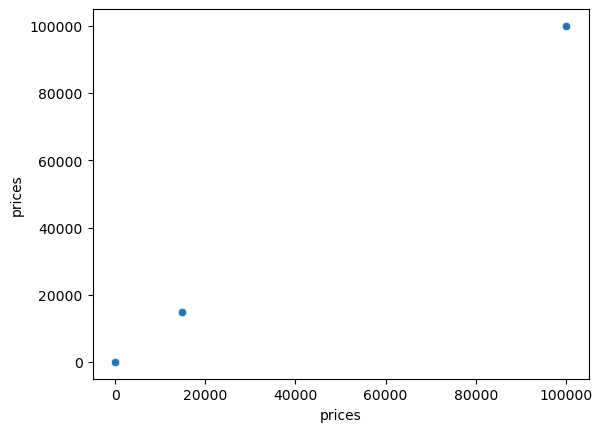

In [4]:
# Creating scatterplot
sns.scatterplot(x = 'prices', y = 'prices',data = df_ords_prods_merge)

In [5]:
# Checking if there are any values above the threshold in my data
df_ords_prods_merge.loc[df_ords_prods_merge['prices'] > 100]

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,prices,match,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_product_price,spending_flag,median_days_between_orders,order_frequency_flag
1576,912404,17,12,2,14,5.0,21553,5,0,Lowfat 2% Milkfat Cottage Cheese,...,14900.0,both,Regularly busy,Most orders,40,Regular customer,108.648299,High spender,5.0,Frequent customer
1638,603376,17,22,6,16,4.0,21553,3,1,Lowfat 2% Milkfat Cottage Cheese,...,14900.0,both,Regularly busy,Most orders,40,Regular customer,108.648299,High spender,5.0,Frequent customer
16522,3264360,135,2,2,21,13.0,21553,6,0,Lowfat 2% Milkfat Cottage Cheese,...,14900.0,both,Regularly busy,Average orders,4,New customer,1154.792308,High spender,11.5,Regular customer
16528,892534,135,3,0,8,12.0,21553,3,1,Lowfat 2% Milkfat Cottage Cheese,...,14900.0,both,Busiest days,Average orders,4,New customer,1154.792308,High spender,11.5,Regular customer
53672,229704,342,8,1,19,30.0,21553,9,0,Lowfat 2% Milkfat Cottage Cheese,...,14900.0,both,Busiest days,Average orders,16,Regular customer,114.426619,High spender,20.0,Regular customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32320511,3172853,205650,18,1,9,7.0,21553,17,1,Lowfat 2% Milkfat Cottage Cheese,...,14900.0,both,Busiest days,Most orders,25,Regular customer,351.141618,High spender,6.0,Frequent customer
32347717,2504315,205818,3,5,15,3.0,21553,13,0,Lowfat 2% Milkfat Cottage Cheese,...,14900.0,both,Regularly busy,Most orders,25,Regular customer,170.073770,High spender,12.0,Regular customer
32347727,1108388,205818,5,4,5,1.0,21553,5,1,Lowfat 2% Milkfat Cottage Cheese,...,14900.0,both,Slowest days,Fewest orders,25,Regular customer,170.073770,High spender,12.0,Regular customer
32380527,1916142,206049,1,2,17,7.0,21553,2,0,Lowfat 2% Milkfat Cottage Cheese,...,14900.0,both,Regularly busy,Average orders,5,New customer,938.031250,High spender,7.0,Frequent customer


In [6]:
# marking outliers as missing
df_ords_prods_merge.loc[df_ords_prods_merge['prices'] >100, 'prices'] = np.nan

In [7]:
df_ords_prods_merge['prices'].max()

25.0

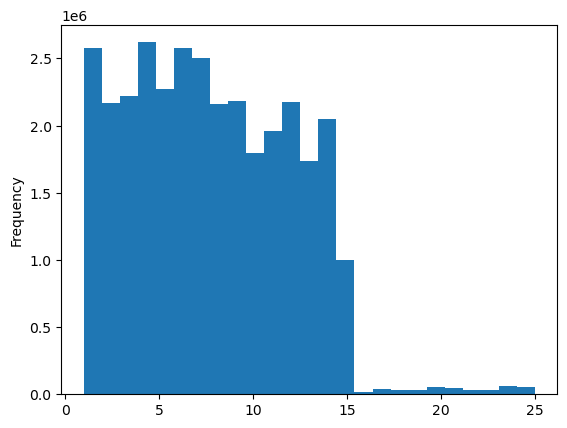

In [8]:
hist = df_ords_prods_merge['prices'].plot.hist(bins = 25)

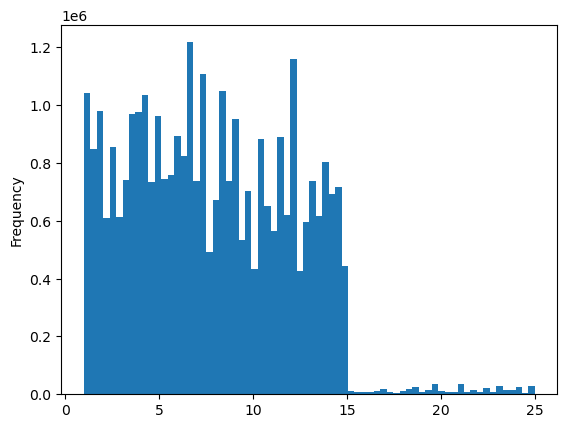

In [9]:
hist = df_ords_prods_merge['prices'].plot.hist(bins = 70)

In [11]:
# Exporting Histogram as image
hist.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'hist_orders_dow.png'))

In [12]:
# Sampling data
np.random.seed(4)
dev = np.random.rand(len(df_ords_prods_merge)) <= 0.7

In [13]:
dev

array([False,  True, False, ...,  True,  True,  True])

In [14]:
np.random.rand(10)

array([0.93546686, 0.06557465, 0.85698584, 0.24456371, 0.22683171,
       0.17068366, 0.27008946, 0.52534234, 0.83151571, 0.78153402])

In [15]:
# Creating a list holding True/False values to the test np.random.rant() <= 0.7
dev = np.random.rand(len(df_ords_prods_merge)) <= 0.7

In [16]:
# Store 70% of the sample in the df big
big = df_ords_prods_merge[dev]

In [17]:
# Store 30% of the sample in the df small
small = df_ords_prods_merge[~dev]

In [18]:
len(df_ords_prods_merge)

32404859

In [19]:
len(big) + len(small)

32404859

In [21]:
# Reducing the samples to only columns that are necessary
df_2 = small[['orders_day_of_week','prices']]

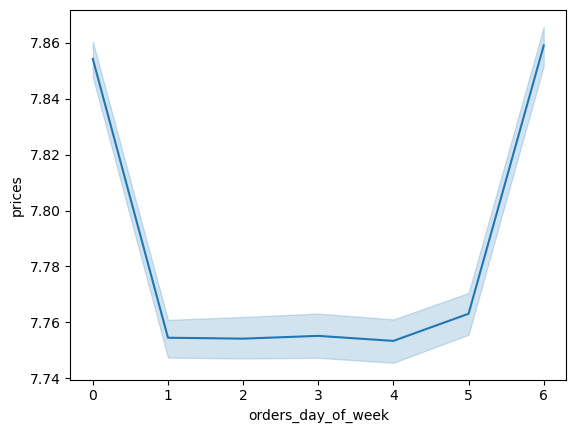

In [22]:
# Creating line chart
line = sns.lineplot(data = df_2, x = 'orders_day_of_week',y = 'prices')

In [23]:
# Exporting Line as image
line.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'line_orders_dow.png'))